# **Exploratory Data Analysis (EDA)**

# **Dataset**
District Rainfall form 1901 to 2017


# 1. Dataset Overview

In [1]:
#1. Dataset Overview
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


url = 'https://drive.google.com/uc?id=1fuhjzhTQOqNE-xK3ccwIi4r6uF7EZvEd'
df = pd.read_csv(url)
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [2]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

In [3]:
#statistics  over view
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4188.000000,4184.000000,4185.000000,4182.000000,4184.000000,4185.000000,4183.000000,4181.000000,4184.000000,4182.000000,4181.000000,4177.000000,4178.000000,4162.000000,4182.000000,4179.000000,4178.000000,4175.000000
mean,1959.220630,18.938337,21.599427,27.412912,43.071845,85.660860,230.117475,347.020043,289.742185,197.316332,95.324707,39.496433,18.968645,1409.449207,40.522979,155.820914,1063.851580,153.648623
std,33.717097,33.793128,35.731734,46.927963,68.150985,122.695137,234.292087,268.850702,188.426071,135.547646,99.194851,68.358706,43.053759,902.599421,59.293904,201.198627,706.666045,166.863171
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.600000,70.800000,175.600000,155.850000,100.400000,14.600000,0.600000,0.100000,803.025000,4.000000,24.000000,573.850000,34.000000
50%,1959.000000,5.950000,6.500000,7.900000,15.450000,36.900000,138.800000,285.000000,258.500000,173.700000,65.200000,9.400000,3.000000,1120.350000,18.900000,74.800000,880.600000,97.700000
75%,1988.000000,22.000000,26.600000,31.375000,49.650000,97.800000,305.000000,418.500000,377.625000,266.125000,148.300000,45.300000,17.500000,1643.575000,50.175000,196.950000,1287.450000,211.800000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [4]:
#checking for missing values
df.isnull().sum()

,0
SUBDIVISION,0
YEAR,0
JAN,4
FEB,3
MAR,6
APR,4
MAY,3
JUN,5
JUL,7
AUG,4


In [5]:
#checking column names
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

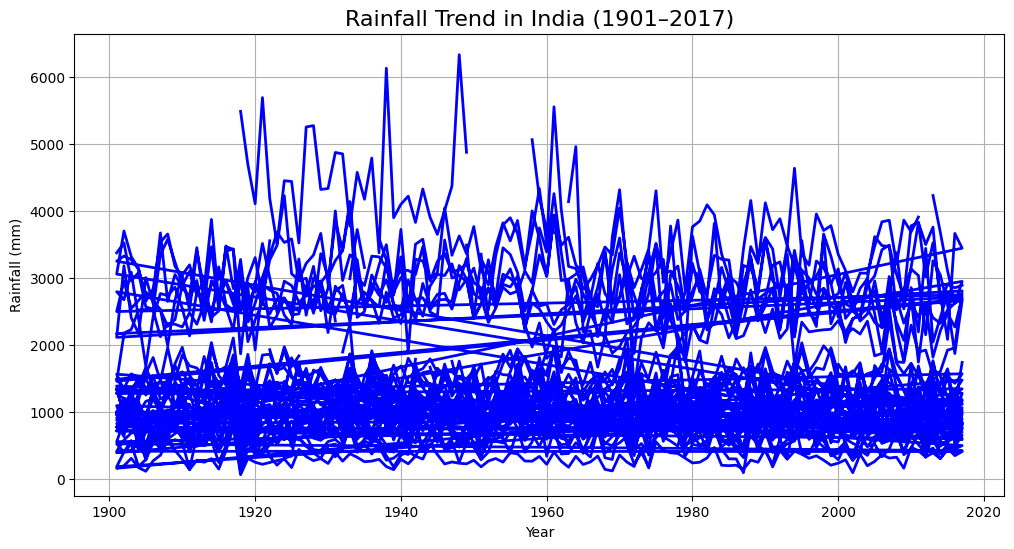

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['YEAR'], df['ANNUAL'], color='blue', linewidth=2)
plt.title('Rainfall Trend in India (1901–2017)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

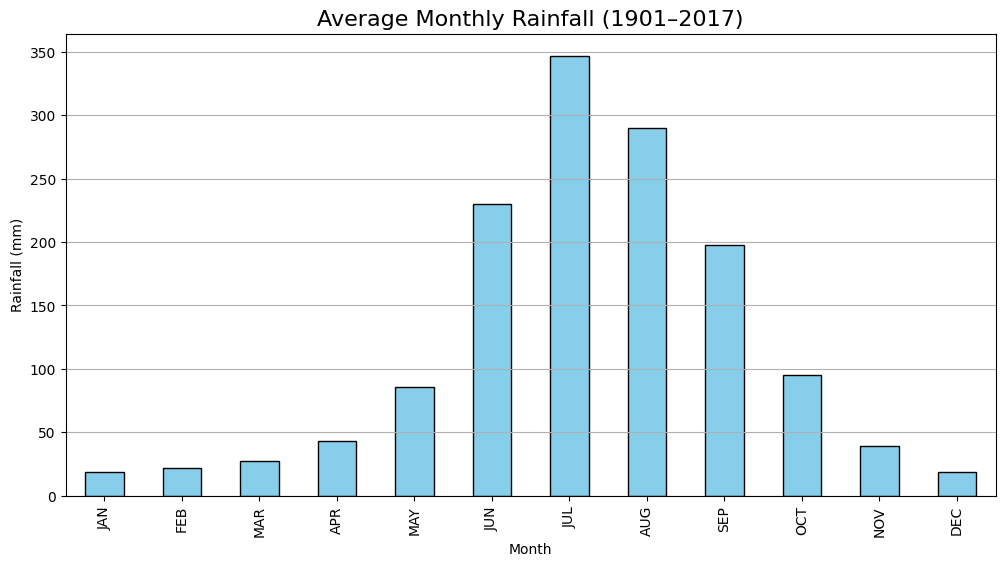

In [7]:
#average monthly rainfall
monthly_cols = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
plt.figure(figsize=(12,6))
df[monthly_cols].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Monthly Rainfall (1901–2017)', fontsize=16)
plt.ylabel('Rainfall (mm)')
plt.xlabel('Month')
plt.grid(axis='y')
plt.show()

In [8]:
#first 5 row
print("First 5 Rows:")
display(df.head())

#last 5 row
print("\nLast 5 Rows:")
display(df.tail())

#Shape (rows × columns)
print("\nShape of Dataset:", df.shape)

#List of column names
print("\nColumn Names:", df.columns.tolist())

#Data types of each feature
print("\nData Types:")
print(df.dtypes)

#Count of missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

#Count of unique values
print("\nUnique Subdivisions:", df['SUBDIVISION'].nunique())
print("Unique Years:", df['YEAR'].nunique())

First 5 Rows:


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8



Last 5 Rows:


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4
4187,Lakshadweep,2017,21.3,0.9,100.2,1.8,145.7,521.9,164.2,206.2,216.0,137.1,63.5,160.1,1738.9,22.2,247.8,1108.3,360.7



Shape of Dataset: (4188, 19)

Column Names: ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND']

Data Types:
SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
JF             float64
MAM            float64
JJAS           float64
OND            float64
dtype: object

Missing Values per Column:
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS       

# **2. Data Quality Checks**

In [9]:
#checking duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# checking for any invalid or negative rainfall values
negative_values = (df.select_dtypes(include=['float', 'int']) < 0).sum()
print("\nNumber of negative values per column:")
print(negative_values)

# checking for inconsistent capitalization in subdivision names
print("\nUnique SUBDIVISION values (sample 10):")
print(df['SUBDIVISION'].unique()[:10])


Number of duplicate rows: 0

Number of negative values per column:
YEAR      0
JAN       0
FEB       0
MAR       0
APR       0
MAY       0
JUN       0
JUL       0
AUG       0
SEP       0
OCT       0
NOV       0
DEC       0
ANNUAL    0
JF        0
MAM       0
JJAS      0
OND       0
dtype: int64

Unique SUBDIVISION values (sample 10):
['Andaman & Nicobar Islands' 'Arunachal Pradesh' 'Assam & Meghalaya'
 'Naga Mani Mizo Tripura' 'Sub Himalayan West Bengal & Sikkim'
 'Gangetic West Bengal' 'Orissa' 'Jharkhand' 'Bihar' 'East Uttar Pradesh']


# **3. Data Cleaning**

In [10]:
#count missing values before
print("Missing values before cleaning:\n", df.isnull().sum())

#fill missing numeric values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

#fill missing numeric values with column mean
print("\nMissing values after cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

Missing values after cleaning:
 SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64


# **4. Descriptive Statistics**


In [11]:
#descriptive statistics
desc_stats = df.describe().T
display(desc_stats)

mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode(numeric_only=True).iloc[0]
variance = df.var(numeric_only=True)
std_dev = df.std(numeric_only=True)

print("\n Mean of Rainfall Data:\n", mean_values)
print("\n Median of Rainfall Data:\n", median_values)
print("\n Mode of Rainfall Data:\n", mode_values)
print("\n Variance of Rainfall Data:\n", variance)
print("\n Standard Deviation of Rainfall Data:\n", std_dev)

#skewness and kurtosis
skewness = df.skew(numeric_only=True)
kurtosis = df.kurt(numeric_only=True)

print("\n Skewness of Rainfall Data:\n", skewness)
print("\n Kurtosis of Rainfall Data:\n", kurtosis)


,count,mean,std,min,25%,50%,75%,max
YEAR,4188.0,1959.220630,33.717097,1901.0,1930.000,1959.00,1988.000,2017.0
JAN,4188.0,18.938337,33.776982,0.0,0.600,6.00,22.000,583.7
FEB,4188.0,21.599427,35.718931,0.0,0.500,6.50,26.600,403.5
MAR,4188.0,27.412912,46.894327,0.0,1.000,7.90,31.300,605.6
APR,4188.0,43.071845,68.118424,0.0,3.000,15.50,49.525,595.1
MAY,4188.0,85.660860,122.651174,0.0,8.675,36.90,97.725,1168.6
JUN,4188.0,230.117475,234.152152,0.4,70.875,139.00,304.300,1609.9
JUL,4188.0,347.020043,268.625870,0.0,175.900,285.25,418.400,2362.8
AUG,4188.0,289.742185,188.336044,0.0,155.975,258.90,377.525,1664.6
SEP,4188.0,197.316332,135.450491,0.1,100.400,173.90,265.825,1222.0



 Mean of Rainfall Data:
 YEAR      1959.220630
JAN         18.938337
FEB         21.599427
MAR         27.412912
APR         43.071845
MAY         85.660860
JUN        230.117475
JUL        347.020043
AUG        289.742185
SEP        197.316332
OCT         95.324707
NOV         39.496433
DEC         18.968645
ANNUAL    1409.449207
JF          40.522979
MAM        155.820914
JJAS      1063.851580
OND        153.648623
dtype: float64

 Median of Rainfall Data:
 YEAR      1959.00
JAN          6.00
FEB          6.50
MAR          7.90
APR         15.50
MAY         36.90
JUN        139.00
JUL        285.25
AUG        258.90
SEP        173.90
OCT         65.75
NOV          9.45
DEC          3.10
ANNUAL    1124.15
JF          19.00
MAM         75.15
JJAS       881.50
OND         98.35
dtype: float64

 Mode of Rainfall Data:
 YEAR      1916.000000
JAN          0.000000
FEB          0.000000
MAR          0.000000
APR          0.000000
MAY          0.000000
JUN         48.600000
JUL        347.0

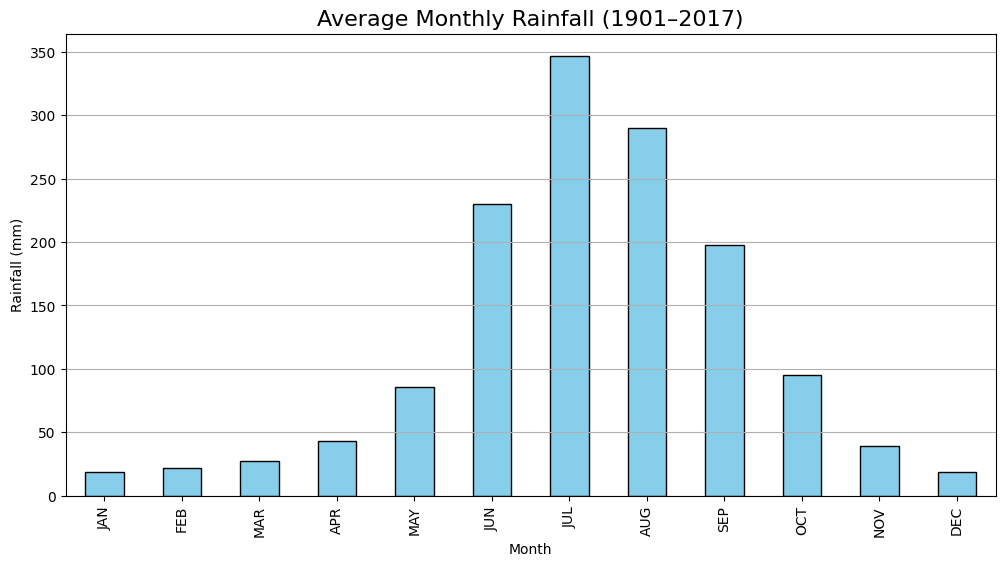

In [12]:

monthly_cols = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
plt.figure(figsize=(12,6))
df[monthly_cols].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Monthly Rainfall (1901–2017)', fontsize=16)
plt.ylabel('Rainfall (mm)')
plt.xlabel('Month')
plt.grid(axis='y')
plt.show()


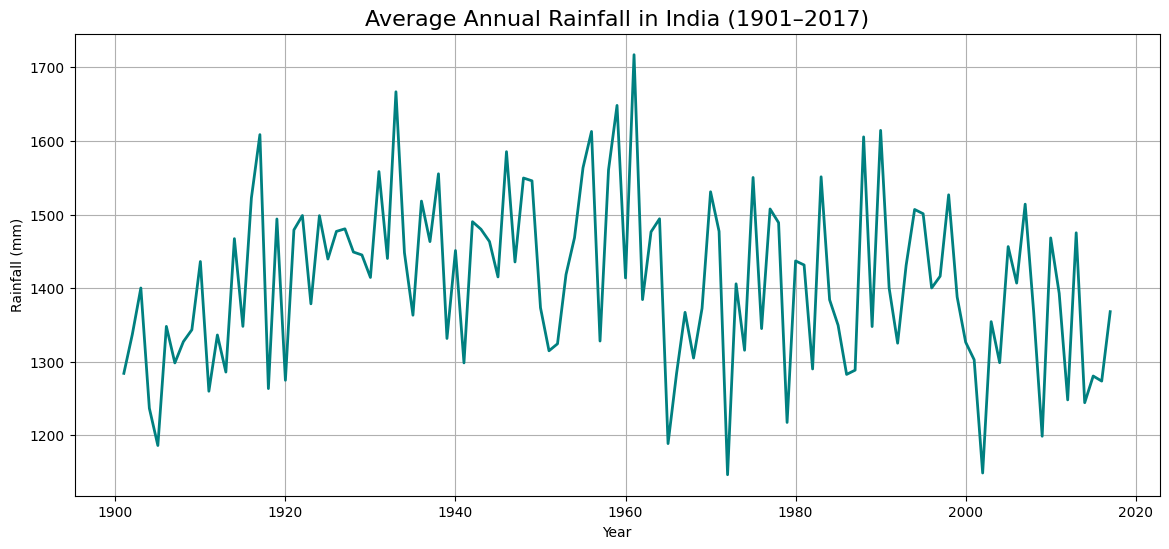

In [13]:
plt.figure(figsize=(14,6))
plt.plot(df.groupby('YEAR')['ANNUAL'].mean(), color='teal', linewidth=2)
plt.title('Average Annual Rainfall in India (1901–2017)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

# **5. Data Transformation & Encoding**

In [14]:
#min max scaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['ANNUAL']])
df['ANNUAL_SCALED'] = scaled
df[['YEAR', 'ANNUAL', 'ANNUAL_SCALED']].head()

,YEAR,ANNUAL,ANNUAL_SCALED
0,1901,3373.2,0.528155
1,1902,3520.7,0.551685
2,1903,2957.4,0.461827
3,1904,3079.6,0.481320
4,1905,2566.7,0.399502


# **6. Outlier Detection & Treatment**

In [15]:
#function to detect outliers
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

#apply for each month
outliers = df[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].apply(detect_outliers_iqr)
print("Outliers detected in each month:\n")
print(outliers)


Outliers detected in each month:

JAN    404
FEB    397
MAR    478
APR    463
MAY    524
JUN    314
JUL    294
AUG    139
SEP    125
OCT    110
NOV    477
DEC    530
dtype: int64


In [16]:
#z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))
outlier_count = (z_scores > 3).sum(axis=0)
print("Outliers detected (Z-Score method):\n")
print(outlier_count)

Outliers detected (Z-Score method):

[  0  92 110 102 110  92  85 113  76  53  56 112  86  36 106  82  75  78
  36]


In [17]:
#select only numeric columns for outlier detection
for col in ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

  #dictionary to store outlier counts
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

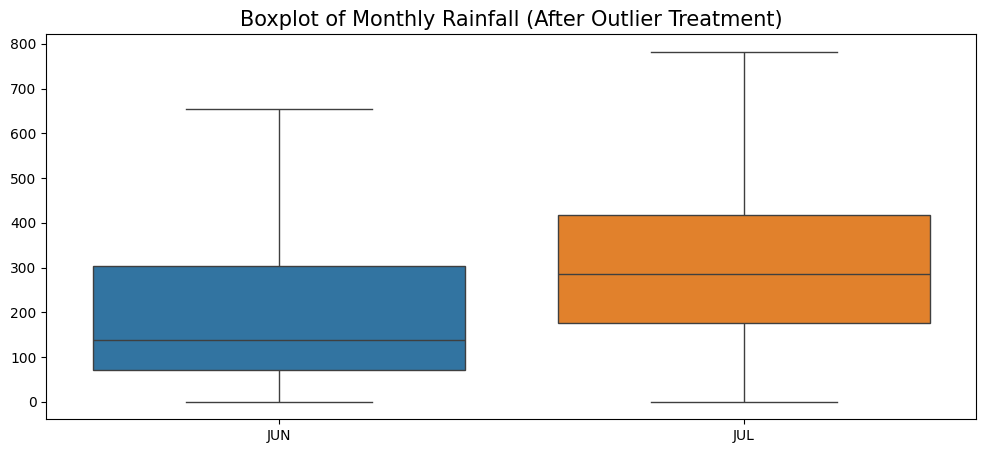

In [18]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['JUN','JUL']])
plt.title('Boxplot of Monthly Rainfall (After Outlier Treatment)', fontsize=15)
plt.show()

# **7. Data Visualization**

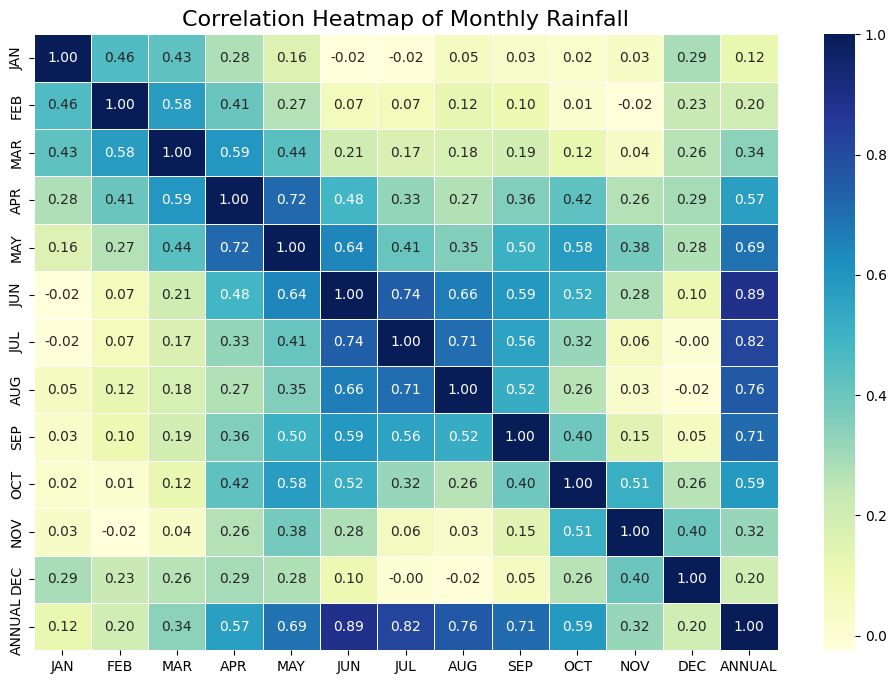

In [19]:
#heatmap
plt.figure(figsize=(12,8))
corr = df[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Monthly Rainfall', fontsize=16)
plt.show()

# **Bivariate Analysis**


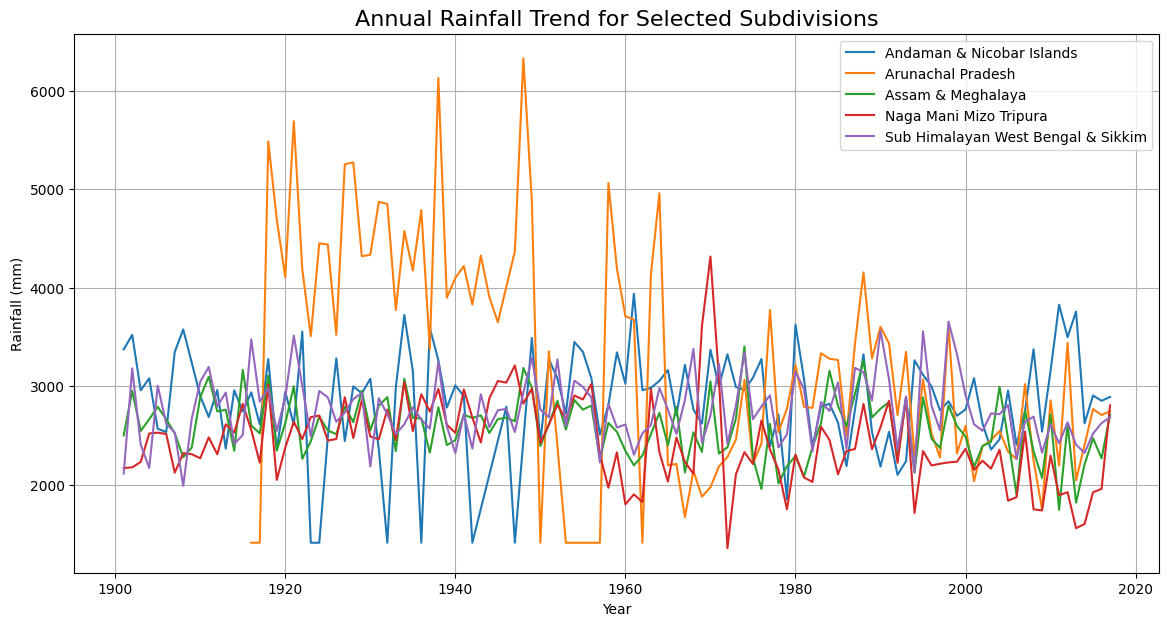

In [20]:
#average annual rainfall trend per subdivision
plt.figure(figsize=(14,7))
for sub in df['SUBDIVISION'].unique()[:5]:  # limit to 5 to keep chart clear
    sub_df = df[df['SUBDIVISION'] == sub]
    plt.plot(sub_df['YEAR'], sub_df['ANNUAL'], label=sub)

plt.title('Annual Rainfall Trend for Selected Subdivisions', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

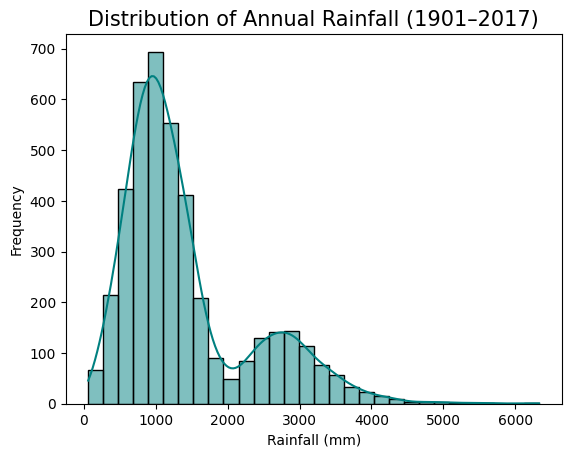

In [21]:
#seasonal comparison
sns.histplot(df['ANNUAL'], bins=30, kde=True, color='teal')
plt.title('Distribution of Annual Rainfall (1901–2017)', fontsize=15)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

# **8. Multivariate Analysis**

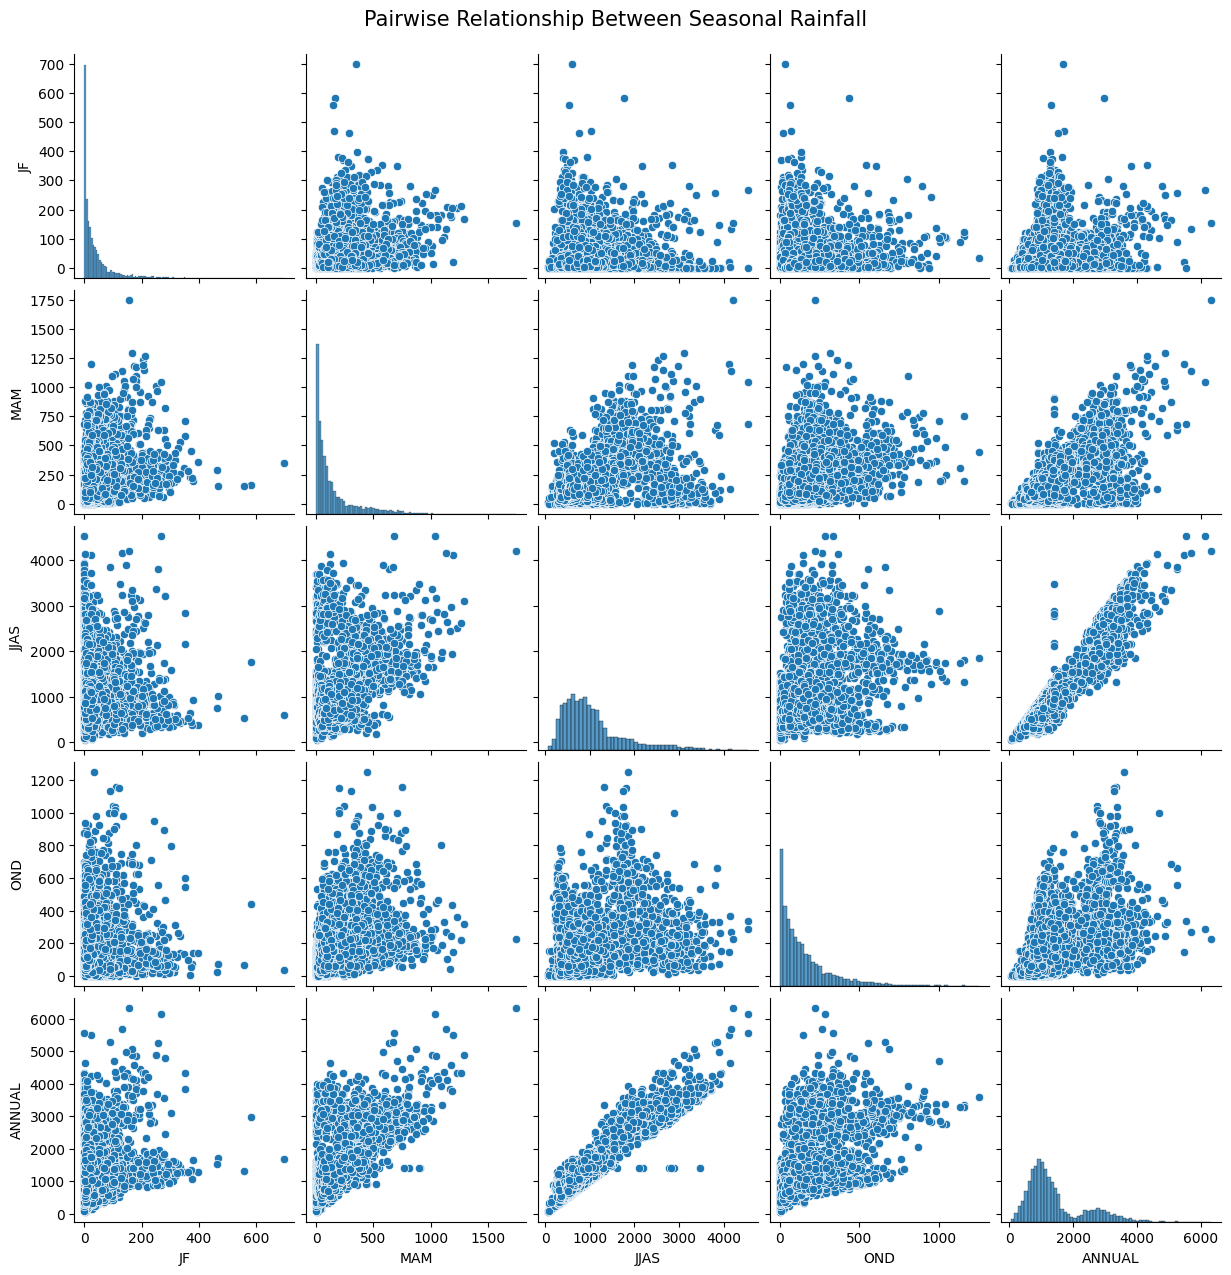

In [22]:
#pairplot
sns.pairplot(df[['JF','MAM','JJAS','OND','ANNUAL']])
plt.suptitle('Pairwise Relationship Between Seasonal Rainfall', y=1.02, fontsize=15)
plt.show()

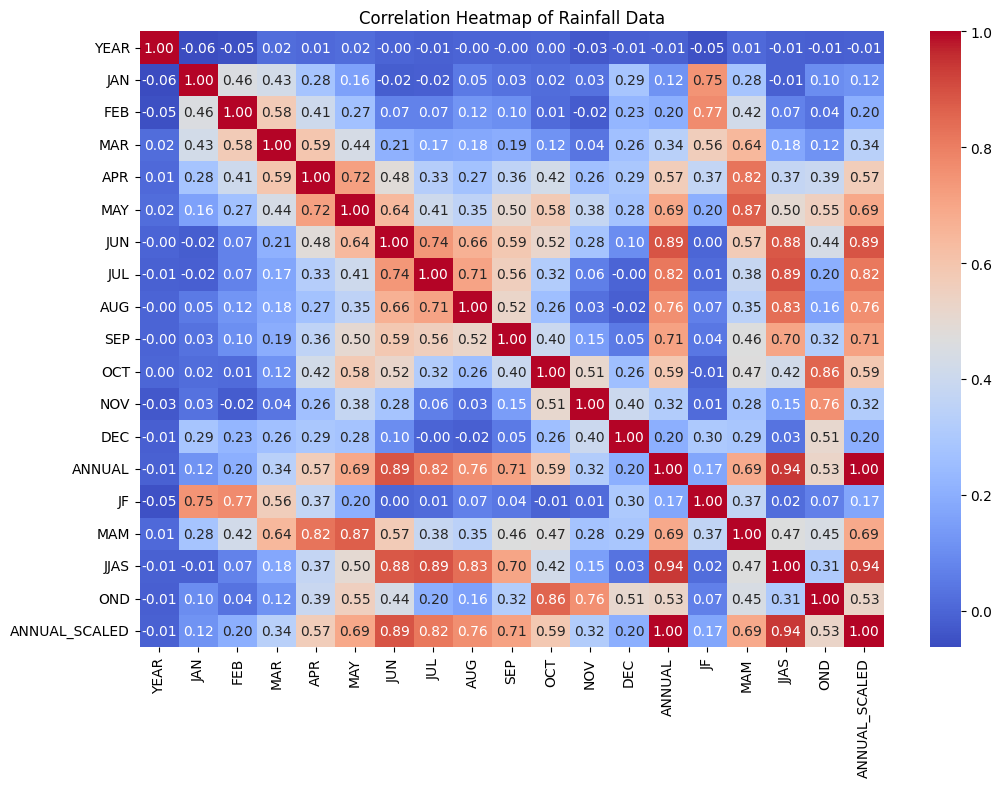

In [23]:
#correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Rainfall Data")
plt.show()


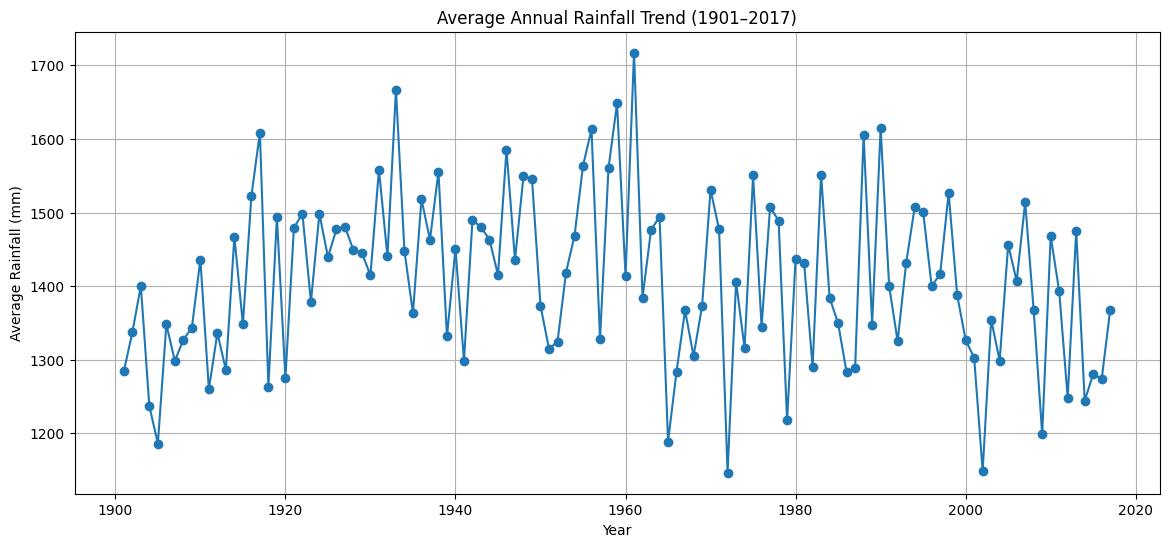

In [24]:
#average annual rainfall trend per subdivision
plt.figure(figsize=(14, 6))
avg_rainfall = df.groupby('YEAR')['ANNUAL'].mean()
avg_rainfall.plot(kind='line', marker='o')
plt.title("Average Annual Rainfall Trend (1901–2017)")
plt.xlabel("Year")
plt.ylabel("Average Rainfall (mm)")
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

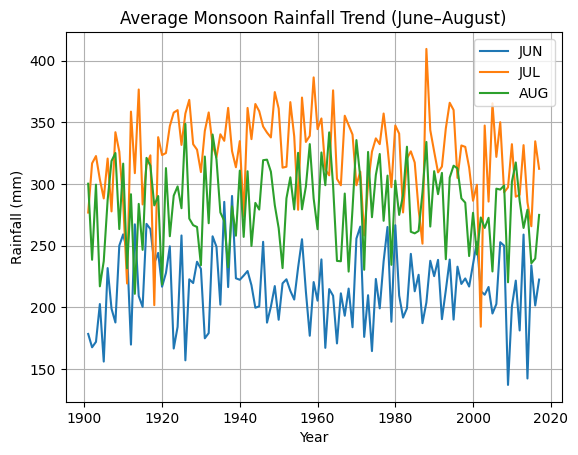

In [25]:
 #visualize yearly rainfall trends over time
plt.figure(figsize=(12, 6))
df.groupby('YEAR')[['JUN', 'JUL', 'AUG']].mean().plot()
plt.title("Average Monsoon Rainfall Trend (June–August)")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.show()


#**📘 Insights & Interpretation**
**🔹 Key Findings**


*   The dataset spans 117 years (1901 – 2017) and includes 36 subdivisions across India.
*    Each record contains monthly rainfall data along with derived seasonal and annual totals.

*   Missing values were minimal and imputed using monthly means, preserving each month’s rainfall distribution.
*   No duplicate or negative entries were found, confirming overall data integrity.

---


**🔹 Trends and Anomalies**


*   The average annual rainfall shows slight long-term variation with noticeable
dips during drought years and peaks during high monsoon years.
*   Monsoon months (June – September) contribute the majority of rainfall, while winter months (November – February) have minimal rainfall.


*   Some subdivisions (e.g., Assam & Meghalaya, Coastal Karnataka) consistently record higher rainfall, while regions like Rajasthan remain arid.
*   A few extreme outlier values were detected in heavy-rainfall regions but were capped to maintain data realism.
---


**🔹 Relationships Between Features**


*   The correlation heatmap reveals strong positive correlations among monsoon months (JUN–SEP) and between these months and the annual total.

*   Pre-monsoon and post-monsoon months show weaker correlations, indicating distinct seasonal rainfall behavior.
*   Pairplots suggest that consistent high monsoon rainfall strongly drives overall annual rainfall trends.


*   Subdivision-level rainfall is regionally dependent — coastal and northeastern zones dominate the upper range.

---
**🔹 Implications for Modeling**

*   Since rainfall patterns vary seasonally, time-series models (e.g., ARIMA, Prophet, or LSTM) would be effective for prediction.

*   For classification tasks (e.g., “high-rainfall” vs “low-rainfall” years), features like JJAS, MAM, and annual totals can serve as strong predictors.

*   Regional clustering (K-Means or hierarchical) could uncover rainfall pattern similarities among subdivisions.



*   Proper feature scaling and seasonality decomposition would enhance model performance for future predictive analytics.
